# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 5: Modelo final

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import re
import joblib
from preprocess import pfeature_process
import csv
import torch
import yaml
import sys
sys.path.insert(1, '../')
from models.network import create_model

In [2]:
#ubicacion de los archivos de datos con el modelo y el archivo FASTA procesado con CD-HIT
model_path = '../models/rf_model.pkl'
cd_hit_path = '../data/processed/VEGF.txt'

In [3]:
model = joblib.load(model_path)

In [4]:
vegf_data = pfeature_process(cd_hit_path, '../data/processed/vegf_processed.csv')

In [5]:
vegf_data

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,RRI_M,RRI_N,RRI_P,RRI_Q,RRI_R,RRI_S,RRI_T,RRI_V,RRI_W,RRI_Y
RGLRRLGRKIAHGVKKYGPTVLRIIRIA,0.563788,-0.658812,-0.299452,-0.618361,0.384032,0.973012,-0.098690,-0.778362,-0.658812,0.563788,...,-0.48418,-0.727467,0.825054,-0.62833,0.305349,-0.932553,1.150383,0.740777,-0.778134,1.289634
KWKLFKKIGIGKFLHSAKKF,0.850245,-0.658812,-0.599851,-0.774988,0.251235,-0.418984,-0.612534,1.030323,-0.658812,0.850245,...,-0.48418,-0.727467,-0.851265,-0.62833,-0.787810,0.763511,-0.773765,-1.036578,1.005100,-0.682112
KWKLFKKIGPGKFLHSAKKF,0.850245,-0.658812,-0.599851,-0.774988,0.251235,-0.418984,0.101139,1.030323,-0.658812,0.850245,...,-0.48418,-0.727467,0.825054,-0.62833,-0.787810,0.763511,-0.773765,-1.036578,1.005100,-0.682112
KWKLFKKIPKFLHSAKKF,1.143364,-0.658812,-0.907237,-0.730238,-0.064949,-0.872485,0.186780,1.272951,-0.658812,1.143364,...,-0.48418,-0.727467,0.825054,-0.62833,-0.787810,0.763511,-0.773765,-1.036578,1.005100,-0.682112
GLFDIAKKVIGVIGSL,-0.981747,0.319786,0.881189,-0.685487,1.515970,1.709951,-0.612534,-0.491620,0.319786,-0.981747,...,-0.48418,-0.727467,-0.851265,-0.62833,-0.787810,0.763511,-0.773765,0.740777,-0.778134,-0.682112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACSHSGWGCGHGSWSCGRRRRRRRR,0.850245,-0.658812,-0.599851,0.940459,-1.203210,-1.111833,-0.612534,-0.293105,-0.658812,0.850245,...,-0.48418,-0.727467,-0.851265,-0.62833,5.787580,0.763511,-0.773765,-1.036578,1.005100,-0.682112
ACHGRRWGCGRHRGRCG,0.930187,-0.658812,-0.683684,0.164779,-0.621432,-0.400089,-0.612534,-0.524705,-0.658812,0.930187,...,-0.48418,-0.727467,-0.851265,-0.62833,0.362884,-0.932553,-0.773765,-1.036578,1.005100,-0.682112
GLFGCGRKKRRQRRRPPQ,1.143364,-0.658812,-0.907237,0.097652,-0.766877,-0.526061,0.971820,-0.557791,-0.658812,1.143364,...,-0.48418,-0.727467,2.501373,1.44575,1.127273,-0.932553,-0.773765,-1.036578,-0.778134,-0.682112
KRRRRRRRRRE,4.241095,0.777518,-4.791476,-1.147912,-3.226787,-2.623503,-0.612534,-1.175391,0.777518,4.241095,...,-0.48418,-0.727467,-0.851265,-0.62833,6.609503,-0.932553,-0.773765,-1.036578,-0.778134,-0.682112


In [8]:
vegf_seqs = pd.read_csv('../data/processed/vegf_processed.csv', index_col='Sequence')
vegf_seqs

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,RRI_M,RRI_N,RRI_P,RRI_Q,RRI_R,RRI_S,RRI_T,RRI_V,RRI_W,RRI_Y
Sequence,,,,,,,,,,,,,,,,,,,,,
RGLRRLGRKIAHGVKKYGPTVLRIIRIA,0.563788,-0.658812,-0.299452,-0.618361,0.384032,0.973012,-0.098690,-0.778362,-0.658812,0.563788,...,-0.48418,-0.727467,0.825054,-0.62833,0.305349,-0.932553,1.150383,0.740777,-0.778134,1.289634
KWKLFKKIGIGKFLHSAKKF,0.850245,-0.658812,-0.599851,-0.774988,0.251235,-0.418984,-0.612534,1.030323,-0.658812,0.850245,...,-0.48418,-0.727467,-0.851265,-0.62833,-0.787810,0.763511,-0.773765,-1.036578,1.005100,-0.682112
KWKLFKKIGPGKFLHSAKKF,0.850245,-0.658812,-0.599851,-0.774988,0.251235,-0.418984,0.101139,1.030323,-0.658812,0.850245,...,-0.48418,-0.727467,0.825054,-0.62833,-0.787810,0.763511,-0.773765,-1.036578,1.005100,-0.682112
KWKLFKKIPKFLHSAKKF,1.143364,-0.658812,-0.907237,-0.730238,-0.064949,-0.872485,0.186780,1.272951,-0.658812,1.143364,...,-0.48418,-0.727467,0.825054,-0.62833,-0.787810,0.763511,-0.773765,-1.036578,1.005100,-0.682112
GLFDIAKKVIGVIGSL,-0.981747,0.319786,0.881189,-0.685487,1.515970,1.709951,-0.612534,-0.491620,0.319786,-0.981747,...,-0.48418,-0.727467,-0.851265,-0.62833,-0.787810,0.763511,-0.773765,0.740777,-0.778134,-0.682112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACSHSGWGCGHGSWSCGRRRRRRRR,0.850245,-0.658812,-0.599851,0.940459,-1.203210,-1.111833,-0.612534,-0.293105,-0.658812,0.850245,...,-0.48418,-0.727467,-0.851265,-0.62833,5.787580,0.763511,-0.773765,-1.036578,1.005100,-0.682112
ACHGRRWGCGRHRGRCG,0.930187,-0.658812,-0.683684,0.164779,-0.621432,-0.400089,-0.612534,-0.524705,-0.658812,0.930187,...,-0.48418,-0.727467,-0.851265,-0.62833,0.362884,-0.932553,-0.773765,-1.036578,1.005100,-0.682112
GLFGCGRKKRRQRRRPPQ,1.143364,-0.658812,-0.907237,0.097652,-0.766877,-0.526061,0.971820,-0.557791,-0.658812,1.143364,...,-0.48418,-0.727467,2.501373,1.44575,1.127273,-0.932553,-0.773765,-1.036578,-0.778134,-0.682112


In [9]:
print(vegf_seqs)

                                  PCP_PC    PCP_NC    PCP_NE    PCP_PO  \
Sequence                                                                 
RGLRRLGRKIAHGVKKYGPTVLRIIRIA    0.563788 -0.658812 -0.299452 -0.618361   
KWKLFKKIGIGKFLHSAKKF            0.850245 -0.658812 -0.599851 -0.774988   
KWKLFKKIGPGKFLHSAKKF            0.850245 -0.658812 -0.599851 -0.774988   
KWKLFKKIPKFLHSAKKF              1.143364 -0.658812 -0.907237 -0.730238   
GLFDIAKKVIGVIGSL               -0.981747  0.319786  0.881189 -0.685487   
...                                  ...       ...       ...       ...   
ACSHSGWGCGHGSWSCGRRRRRRRR       0.850245 -0.658812 -0.599851  0.940459   
ACHGRRWGCGRHRGRCG               0.930187 -0.658812 -0.683684  0.164779   
GLFGCGRKKRRQRRRPPQ              1.143364 -0.658812 -0.907237  0.097652   
KRRRRRRRRRE                     4.241095  0.777518 -4.791476 -1.147912   
GFLGGIGAVLKVLTTGLPALISWIKRKRQQ -0.701951 -0.658812  1.027896  0.097652   

                                  PCP

In [10]:
vegf_predict = model.predict(vegf_seqs)
print(vegf_predict)

[0 1 1 ... 1 1 0]


In [11]:
vegf_y = pd.read_csv('../data/processed/VEGF_y.csv')

In [13]:
vegf_report = classification_report(vegf_y, vegf_predict, target_names=['positive','negative'])
print(vegf_report)

              precision    recall  f1-score   support

    positive       1.00      0.56      0.72      2686
    negative       0.01      0.94      0.03        18

    accuracy                           0.56      2704
   macro avg       0.51      0.75      0.37      2704
weighted avg       0.99      0.56      0.71      2704



# Matriz de confusion

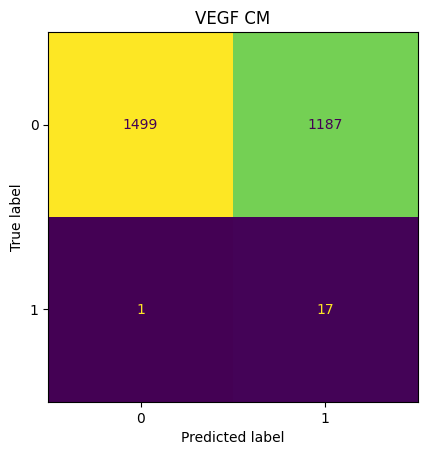

In [14]:
cm_vegf = confusion_matrix(vegf_y, vegf_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_vegf)
disp.plot(colorbar=False)
disp.ax_.set_title('VEGF CM')
plt.show()

# Curva ROC 

In [17]:
from sklearn.metrics import RocCurveDisplay

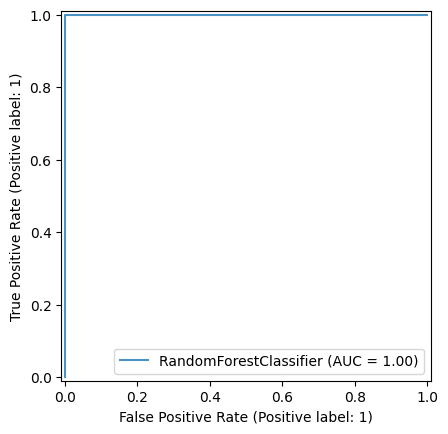

In [20]:

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(model, vegf_seqs, vegf_y, ax=ax, alpha=0.8)
plt.show()

# Presición - Recall

In [21]:
from sklearn.metrics import PrecisionRecallDisplay

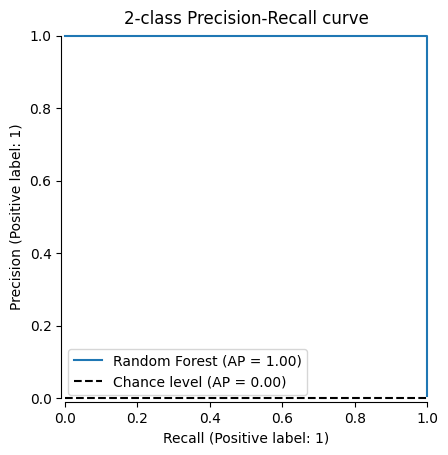

In [24]:

display = PrecisionRecallDisplay.from_estimator(
    model, vegf_seqs, vegf_y, name="Random Forest", plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

# Diagrama de árbol 

In [25]:
from sklearn import tree

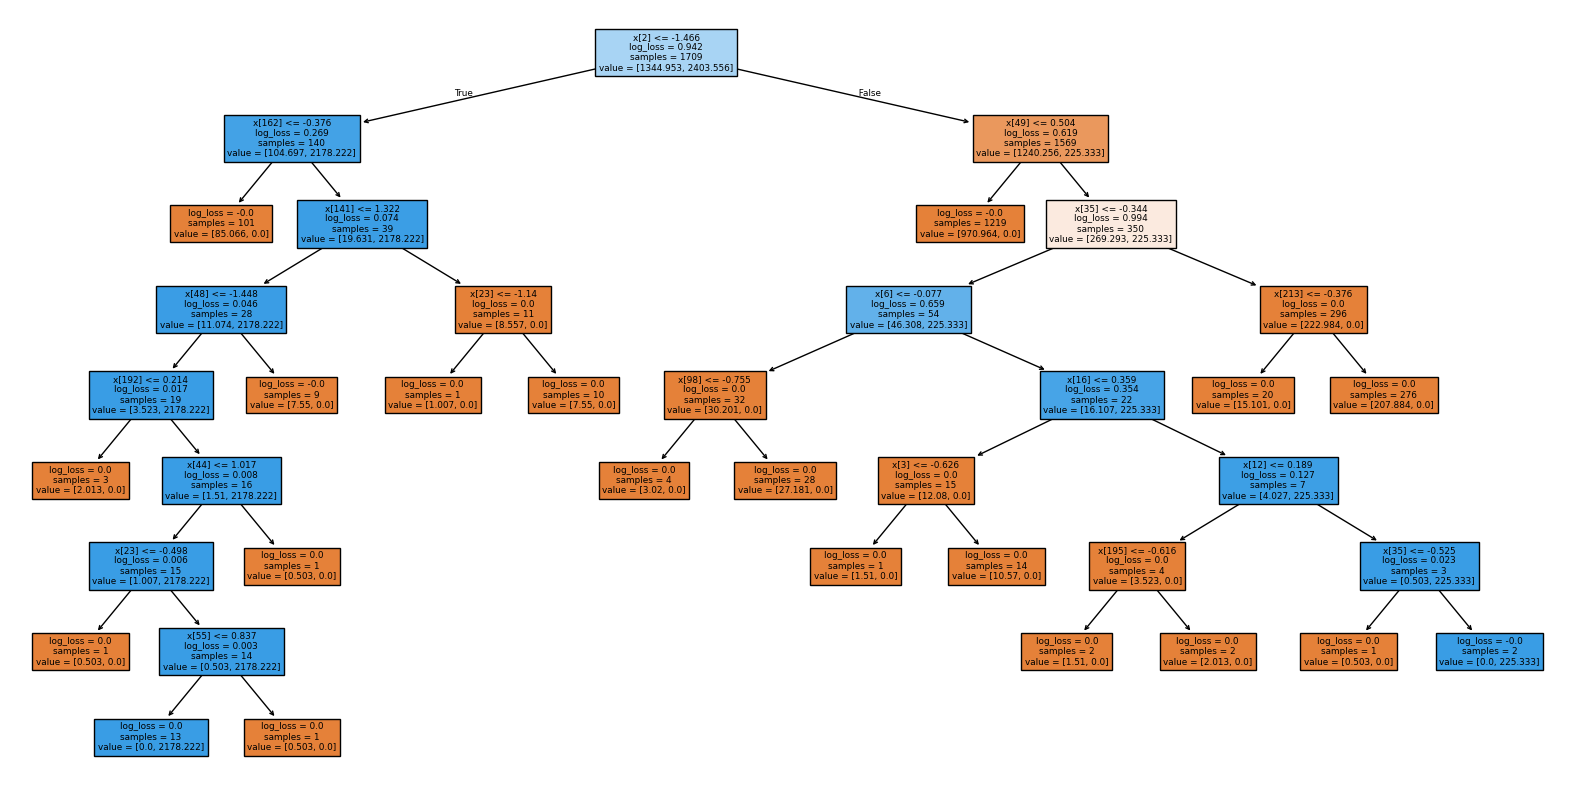

In [28]:
estimator = model.estimators_[0]

# Graficar el árbol
plt.figure(figsize=(20, 10))
tree.plot_tree(estimator, filled=True)
plt.show()